# Data Processing Concepts: Aggregation, Calculated Columns, Joins, Group By, Bar Graphs

This mini-lecture covers advanced data processing concepts using Python and pandas, continuing with the same dataset.

## 4. Aggregation Operations
- Aggregation combines data to produce summary statistics such as the sum of a column, the average, or the smallest or largest value, or median.
- Example: Calculate the mean score for each problem set.

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
df[['ps1', 'ps2', 'ps3']].mean()

ps1    82.4
ps2    82.4
ps3    79.0
dtype: float64

**Lab Exercise: Other Aggregation Operations**
- Find the smallest and largest values for ps2
- Find the average score for ps3
- Find the median score for ps1

As always, use the copilot to help you write, edit, and understand code.


## 5. Calculated Columns
- You can create new columns based on calculations or comparisons between other columns.
- Example: Create a column for the average score across all problem sets.

In [2]:
df['average'] = df[['ps1', 'ps2', 'ps3']].mean(axis=1)
df

,name,ps1,ps2,ps3,average
0,Amina,68,85,72,75.000000
1,Bob,82,60,89,77.000000
2,Charlie,85,92,60,79.000000
3,Dawud,92,85,88,88.333333
4,Ellie,85,90,86,87.000000


**Lab Exercise: Other Comparisons**
- Which students, if any, did better on ps3 than on ps1?
- Which students, if any, continually improved from ps1 to ps2 to ps3?

## 6. Joining Tables
- You can combine data from two tables based on a common column.

Take a look at `program_status.csv` in the data folder.

Below, we'll add a column to the scores table indicating each student's program status (e.g., "grad" or "undergrad").

This only works if both tables have a column with the same values.

In [3]:
status_df = pd.read_csv('program_status.csv')
merged = pd.merge(df, status_df, left_on='name', right_on='student_name')
merged

,name,ps1,ps2,ps3,average,student_name,program_status
0,Amina,68,85,72,75.000000,Amina,grad
1,Bob,82,60,89,77.000000,Bob,grad
2,Charlie,85,92,60,79.000000,Charlie,undergrad
3,Dawud,92,85,88,88.333333,Dawud,undergrad
4,Ellie,85,90,86,87.000000,Ellie,undergrad


## 7. Group By Aggregations

We can group rows by the values in one column, and then aggregate within each group.

- Group by a column and aggregate within each group.
- Example: Find the min, max, average, and median scores for undergrads and grads.

In [4]:
# Compute min, max, mean, and median for average scores by program status
grouped = merged.groupby('program_status')['average'].agg(['count','min', 'max', 'mean', 'median'])
grouped

,count,min,max,mean,median
program_status,,,,,
grad,2,75.0,77.000000,76.000000,76.0
undergrad,3,79.0,88.333333,84.777778,87.0


## 8. Bar Graph Visualization
- Visualize results using a bar graph.
- Example: Bar graph of median average score by program status.

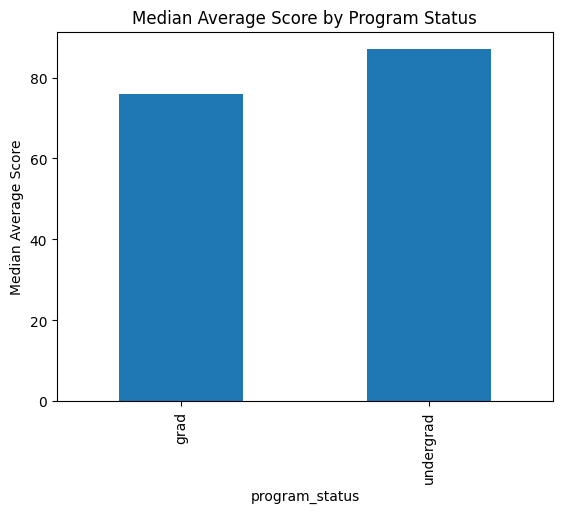

In [5]:
import matplotlib.pyplot as plt
grouped['median'].plot(kind='bar')
plt.ylabel('Median Average Score')
plt.title('Median Average Score by Program Status')
plt.show()

** Lab Exercise: Other Visualizations**
Make some other interesting visualizations of the data in the merged dataset. Could be bar graphs, or maybe some other type of display you know about.